## Hypothesis Testing | Decrease in Average Daily Traffic Volumes in Seattle, Washington during the Coronavirus Pandemic

### The worksheet below examines statistical differences in traffic volumes in Seattle, in an attempt to quantify the reduction in traffic volumes at the onset of the Coronavirus Pandemic to 'normal' traffic volumes.

### Data on traffic patterns in Seattle, Washington was collected from the Washington State Department of Transportation's (WSDOT) Traffic GeoPortal in June 2020. WSDOT uses permanent traffic recording devices to measure the number of vehicles per hour that pass by specific locations at every hour of each day. Data was gathered from seven sites in Seattle for the period ranging from January 1, 2018 through March 31, 2020 (the latest data available). After an initial exploration of the data, three sites were selected for further analysis due to significat data gaps in other sites. The three selected sites serve as a proxy for traffic volumes in Seattle due to their locations on major arterials that provide access to the city; the 520 bridge near its entrance to Interstate 5, Interstate 5 at NE 45th Street near the University of Washington, and Interstate 90 near Rainier Avenue. Each of these locations had several missing values, likely due to maintenance being performed on the devices, so a process of imputation was carried out in which missing values were replaced using mean substitution.

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Import Packages, Read in Data & Prepare it for Analysis
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from IPython.display import display, HTML

In [2]:
# Make the notebook's cells larger
display(HTML("<style>.container { width:70% !important; }</style>"))

In [3]:
traffic = pd.read_csv('CombinedTrafficData_Imputed_Values.csv')

In [4]:
traffic.head()

,SiteId,SiteLocation,Date,DayOfWeek,TravelDirection,Hour1,Hour2,Hour3,Hour4,Hour5,...,Hour15,Hour16,Hour17,Hour18,Hour19,Hour20,Hour21,Hour22,Hour23,Hour24
0,R046,On SR 005 at milepost 168.84 A: S/O NE 45TH ST...,1/1/2018,Monday,Northbound,3957,4223,3102,1681,942,...,5072,5050,4972,4555,4083,3815,3147,2742,2068,1943
1,R046,On SR 005 at milepost 168.84 A: S/O NE 45TH ST...,1/2/2018,Tuesday,Northbound,1252,748,594,532,1076,...,6454,6793,6412,6291,6317,4821,3852,3238,2584,2326
2,R046,On SR 005 at milepost 168.84 A: S/O NE 45TH ST...,1/3/2018,Wednesday,Northbound,1602,1094,817,633,1039,...,6304,6490,6343,6506,6366,5000,3972,3416,2615,2343
3,R046,On SR 005 at milepost 168.84 A: S/O NE 45TH ST...,1/4/2018,Thursday,Northbound,1460,982,754,647,1064,...,6367,6441,6173,6300,6220,5282,4184,3708,2862,2488
4,R046,On SR 005 at milepost 168.84 A: S/O NE 45TH ST...,1/5/2018,Friday,Northbound,1561,968,767,696,1060,...,6253,6515,6158,5969,6188,5240,4138,3864,3421,3482


In [5]:
# Convert Date string into a Date Format
traffic['Date'] = pd.to_datetime(traffic['Date'])

In [6]:
# Select January, February, and March as our period of Observation
jfm_traffic = traffic[(pd.DatetimeIndex(traffic.Date).month < 4)]

In [7]:
# Add a separate column for Year, Month, and Day
jfm_traffic = jfm_traffic.assign(Year = pd.DatetimeIndex(jfm_traffic.Date).year,
                                 Month = pd.DatetimeIndex(jfm_traffic.Date).month,
                                 Day = pd.DatetimeIndex(jfm_traffic.Date).day)

In [8]:
# Group the data by date (Year, Month, Day) to collapse Travel Direction.
# Before grouping, there are two rows for each date, one for each direction of travel.
grouped_traffic = jfm_traffic.groupby(['Year','Month','Day'], as_index= False).sum()

In [9]:
# Add a new column that computes the total number of vehicles per day for each observation.
grouped_traffic['NumVehicles'] = grouped_traffic.iloc[:,3:27].sum(axis=1)

In [10]:
grouped_traffic.sample(5)

,Year,Month,Day,Hour1,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,...,Hour16,Hour17,Hour18,Hour19,Hour20,Hour21,Hour22,Hour23,Hour24,NumVehicles
170,2019,3,22,4183,2489,2232,2537,5386,11337,20481,...,24489,23567,25255,23393,20516,16762,15210,13659,11193,415149
62,2018,3,4,7712,5692,4506,2459,2186,3839,6868,...,21183,23734,22400,18699,15982,13419,13441,8465,5516,328906
262,2020,3,23,1668,1046,995,1370,3374,7937,12865,...,15870,15680,14245,11508,8559,6201,4671,3800,2952,219728
11,2018,1,12,4224,2469,2061,2387,4840,10932,20081,...,24006,23587,23474,21923,19183,15043,14168,13287,10451,402114
240,2020,3,1,7044,4825,3885,2113,1975,3685,6828,...,23565,22639,21147,18208,15790,13190,10723,7453,5371,319040


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Visualize the Distribution of Data - Bring in Tableau Visualization
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
%%HTML
<div class='tableauPlaceholder' id='viz1596763938375' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;5B&#47;5BRFQMPTH&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;5BRFQMPTH' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;5B&#47;5BRFQMPTH&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1596763938375');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### In the visualization above, each dots represent the total traffic volumes for one day across the three sites for a given hour. Orange dots represent days that took place in 2020, and blue dots represent days in 2018 and 2019. It quickly becomes clear that many of the low traffic volumes occurred in 2020. However, several of the lowest volume days took place in February 2019, during Seattle's infamous Snowmaggedon: https://www.seattleweatherblog.com/snow/biggest-february-snowstorm-decades-blankets-seattle/

### Hovering over the dots provides additional information, including the date, traffic volumes for each site, and direction of traffic.

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Is there a statistical difference in the difference in traffic volumes in 2020 compared with the 2018-2019 period?
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Alpha Level = .01
## Null Hypothesis: There has been no change in mean daily traffic volumes in Seattle, Washington during the coronavirus pandemic compared to the same period in prior years.
## Alternative Hypothesis: There has been a decrease in mean daily traffic volumes in Seattle, Washington during the coronavirus pandemic compared to the same period in prior years.
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Statistical Significance for Jan-Mar 2018 & 2019 vs 2020; All Days
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [12]:
# Split traffic into 2018-2019 grouping and 2020 grouping
traffic_2020 = grouped_traffic.loc[grouped_traffic['Year'] == 2020]
traffic_2018_2019 = grouped_traffic.loc[grouped_traffic['Year'] != 2020]

In [13]:
# Distribution of Traffic Volumes across the two groups measured by standard deviation
np.std(traffic_2020['NumVehicles']), np.std(traffic_2018_2019['NumVehicles'])

(72685.85764798863, 52951.62506616298)

In [14]:
# The standard deviations are not equal - should use Welch's 2 sample, one-sided t-test.
# Create a function that calculates a one-tailed Welch's test statistic 
def tstat(group1, group2):
    avg_g1 = np.mean(group1['NumVehicles'])
    avg_g2 = np.mean(group2['NumVehicles'])

    std_g1 = np.std(group1['NumVehicles'], ddof = 1)
    std_g2 = np.std(group2['NumVehicles'], ddof = 1)

    num_obs_g1 = len(group1['NumVehicles'])
    num_obs_g2 = len(group2['NumVehicles'])
    
    numerator = avg_g1 - avg_g2
    denominator = np.sqrt( (std_g1**2/num_obs_g1) + (std_g2**2/num_obs_g2) )

    degrees_freedom = ((std_g1**2/num_obs_g1) + 
                       (std_g2**2/num_obs_g2))**2 / ((std_g1**4)/((num_obs_g1**2)*(num_obs_g1-1)) +
                                                     (std_g2**4)/((num_obs_g2**2)*(num_obs_g2-1)))

    welchs_t_stat = numerator/denominator
    
    return welchs_t_stat, degrees_freedom

In [15]:
print("T-Statistic:{}\nDegrees of Freedom: {}".format(tstat(traffic_2020, traffic_2018_2019)[0],
                                                      tstat(traffic_2020, traffic_2018_2019)[1]))

T-Statistic:-4.860992575933441
Degrees of Freedom: 139.44691079383293


In [16]:
jfm_pval = stats.t.sf(np.abs(tstat(traffic_2020, traffic_2018_2019)[0]), tstat(traffic_2020, traffic_2018_2019)[1])
print("P Value: {}".format('%.10f' % jfm_pval))

P Value: 0.0000015521


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## We Can Reject the Null Hypothesis
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Statistical Significance for Jan-Mar 2018 & 2019 vs 2020; Weekdays Only
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [17]:
# Create a copy of the dataframe
jfm_traffic_weekdays = jfm_traffic.copy()

In [18]:
# Remove Saturday and Sundays from the data
jfm_traffic_weekdays = jfm_traffic_weekdays.loc[(jfm_traffic_weekdays.DayOfWeek != 'Saturday') & 
                                                (jfm_traffic_weekdays.DayOfWeek != 'Sunday')]

In [19]:
# Group the data by date and add a column to calculate the total number of vehicles per day for each observation.
grouped_traffic_weekdays = jfm_traffic_weekdays.groupby(['Year','Month','Day'], as_index= False).sum()
grouped_traffic_weekdays['NumVehicles'] = grouped_traffic_weekdays.iloc[:,3:27].sum(axis=1)
grouped_traffic_weekdays.sample(5)

,Year,Month,Day,Hour1,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,...,Hour16,Hour17,Hour18,Hour19,Hour20,Hour21,Hour22,Hour23,Hour24,NumVehicles
99,2019,2,18,4163,2414,1966,1955,4343,9048,14794,...,23448,23973,23258,20532,16560,13050,11098,8349,6231,347022
192,2020,3,30,1433,898,797,958,2223,4851,8850,...,11155,11847,11233,8493,6677,4854,3545,2797,2174,162048
49,2018,3,9,4001,2424,2040,2366,5009,11021,21423,...,23452,25079,25286,23029,20526,16089,15495,13766,11892,415586
67,2019,1,3,3617,2240,2035,2199,5048,10850,19036,...,21159,21676,22876,20602,16698,13046,11677,8799,6013,363851
37,2018,2,21,3570,2149,1800,2232,4977,11163,21160,...,23756,25480,25618,23192,18018,14192,12429,9032,5846,393581


In [20]:
# Split traffic into 2018-2019 grouping and 2020 grouping
traffic_2020_weekdays = grouped_traffic_weekdays.loc[grouped_traffic_weekdays['Year'] == 2020]
traffic_2018_2019_weekdays = grouped_traffic_weekdays.loc[grouped_traffic_weekdays['Year'] != 2020]

In [21]:
print("T-Statistic:{}\nDegrees of Freedom: {}".format(tstat(traffic_2020, traffic_2018_2019_weekdays)[0],
                                                      tstat(traffic_2020, traffic_2018_2019_weekdays)[1]))

T-Statistic:-6.610581861391088
Degrees of Freedom: 138.02999324299105


In [22]:
weekday_pval = stats.t.sf(np.abs(tstat(traffic_2020_weekdays, traffic_2018_2019_weekdays)[0]), 
                  tstat(traffic_2020_weekdays, traffic_2018_2019_weekdays)[1])
print("P Value: {}".format('%.10f' % weekday_pval))

P Value: 0.0000148979


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## We can Reject the Null Hypothesis
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Statistical Significance for Mar 2018 & 2019 vs Mar 2020 Weekdays Only
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [23]:
# Follow similar steps above, grouping by date and creating a column to calculate 
# the total number of vehicles per day for each observation. Then exlude January and February.
mar_traffic_weekdays = jfm_traffic_weekdays.copy()
mar_traffic_weekdays = mar_traffic_weekdays[(pd.DatetimeIndex(mar_traffic_weekdays.Date).month == 3)]
mar_grouped_traffic_weekdays = mar_traffic_weekdays.groupby(['Year','Month','Day'], as_index= False).sum()
mar_grouped_traffic_weekdays['NumVehicles'] = mar_grouped_traffic_weekdays.iloc[:,3:27].sum(axis=1)
mar_grouped_traffic_weekdays.sample(5)

,Year,Month,Day,Hour1,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,...,Hour16,Hour17,Hour18,Hour19,Hour20,Hour21,Hour22,Hour23,Hour24,NumVehicles
19,2018,3,28,3723,2322,2013,2344,4730,11687,21594,...,23471,24468,25255,25070,20273,16441,14624,10709,6959,410063
45,2020,3,4,3025,1869,1721,2062,5183,11742,22290,...,23909,25293,25787,22392,17893,13788,11882,8433,6025,384954
7,2018,3,12,3491,2122,1801,2117,5075,11195,21040,...,24321,24444,25631,22492,18026,14755,12632,8684,5632,391448
52,2020,3,13,3069,2089,1954,1854,4288,9410,15716,...,19409,19739,19601,17100,14183,10896,9368,7882,6449,310587
62,2020,3,27,1481,1070,1091,1151,2139,4738,8425,...,12129,12145,11943,9674,7654,5736,4178,3273,2683,171821


In [24]:
# Split traffic into 2018-2019 grouping and 2020 grouping
mar_traffic_2020_weekdays = mar_grouped_traffic_weekdays.loc[mar_grouped_traffic_weekdays['Year'] == 2020]
mar_traffic_2018_2019_weekdays = mar_grouped_traffic_weekdays.loc[mar_grouped_traffic_weekdays['Year'] != 2020]

In [25]:
print("T-Statistic:{}\nDegrees of Freedom: {}".format(tstat(mar_traffic_2020_weekdays, mar_traffic_2018_2019_weekdays)[0],
                                                      tstat(mar_traffic_2020_weekdays, mar_traffic_2018_2019_weekdays)[1]))

T-Statistic:-7.623467693739753
Degrees of Freedom: 21.54773080278684


In [26]:
mar_weekday_pval = stats.t.sf(np.abs(tstat(mar_traffic_2020_weekdays, mar_traffic_2018_2019_weekdays)[0]), 
                  tstat(mar_traffic_2020_weekdays, mar_traffic_2018_2019_weekdays)[1])
print("P Value: {}".format('%.10f' % mar_weekday_pval))

P Value: 0.0000000746


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## We can Reject the Null Hypothesis
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [27]:
print("P Value for All Days, January 1 - March 31: {}\nP Value for Weekdays Only, January 1 - March 31: {}\n"
      "P Value for Weekdays Only, March 1 - March 31: {}".format('%.10f' % jfm_pval, '%.10f' % weekday_pval, '%.10f' % mar_weekday_pval))

P Value for All Days, January 1 - March 31: 0.0000015521
P Value for Weekdays Only, January 1 - March 31: 0.0000148979
P Value for Weekdays Only, March 1 - March 31: 0.0000000746


#### All tests yielded statistically significant results at the .01 alpha levels, allowing us to reject the null hypothesis that there has been no change in mean daily traffic volumes in Seattle, Washington during the coronavirus pandemic compared to the same period in prior years. It can be difficult to compare p values when they are so small, so below we rescale them and plot them.

Text(0, 0.5, 'P-Values multiplied by 10M')

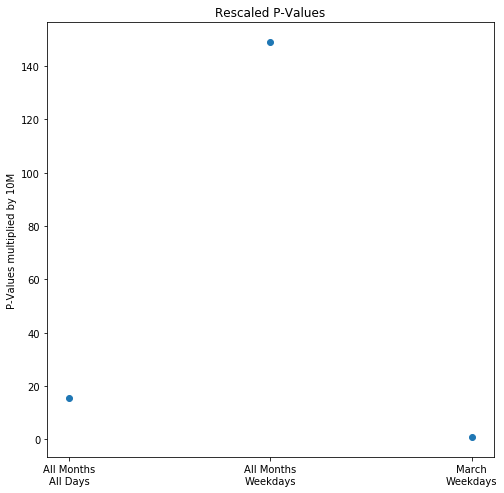

In [28]:
plt.figure(figsize=(8, 8))
plt.scatter(['All Months\nAll Days', 'All Months\nWeekdays', 'March\nWeekdays'],
            [jfm_pval*10000000, weekday_pval*10000000, mar_weekday_pval*10000000])
plt.title('Rescaled P-Values')
plt.ylabel('P-Values multiplied by 10M')

#### The chart above shows rescaled p values so we can get a sense of the strongest test (lowest p value), which appear to be weekdays in March. This makes sense, as many companies started encouraging employees to work from home in March, and Governor Inslee's Stay Home Order was issued on March 23, 2020.

# Notes

## OVERVIEW, STEPS, AND PROCESS FOR NOT INCLUDING ALL SITES AND IMPUTING MISSING VALUES
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### ISSUES WITH SITES
-----------------
- Site D10 did not have any data for February 2019
- Site R49R did not have any data for January 2020
- Site R017 did not have any data for westbound traffic in March 2018
- Site S202 did not have any data for northbound traffic in 2018 or southbound traffic in 2019

All of these sites are excluded from the analysis

### IMPUTING MISSING VALUES FOR REMAINING SITES
-------------------------------------------
The remaining sites (R046, R117, and S502) all had missing data values for certain days or direction (north/south, east/west)
on a certain day. These missing values were imputed by calculating the mean traffic volumes for that day of the week on the
year/month combination. For example, if there was no data for Sunday March 11, 2018, the mean traffic volume for Sundays in
March of 2018 was calculated and assumed to be the traffic volume for that day. The time of day was ignored, and each hour
was given the same traffic volume such that each hour summed together for Sunday March 11, 2018 would equal the average traffic
volume for Sundays in March 2018. To ensure that values were whole numbers and estimates were conservate, the FLOOR function was used"
FLOOR((Avg Num Vehicles/24),1)

### For the sites that were included in the analysis, the following days and directions had missing values:
---------
- Site R046:
    - March 11, 2018
    - March 25, 2018 (southbound only)
    - February 23, 2019 (northbound only)
    - March 10, 2019
    - January 17, 2020 (southbound only
    - March 8, 2020

---------
- Site R117:
    - February 18, 2018 (westbound only)
    - March 11, 2018
    - March 10, 2019
    - February 4, 2020 (westbound only)
    - February 5, 2020 (westbound only)
    - February 11, 2020
    - February 12, 2020
    - March 8, 2020

---------
- Site S502:
    - March 11, 2018
    - March 10, 2019
    - January 28, 2020 (eastbound only)
    - March 8, 2020

#### John Wachter | June 6, 2020